# CASE STUDY:
## CUSTOMER ANALYSIS FOR RETAIL

In [2]:
# Import all required packages

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [3]:
# import files from the source

customers = pd.read_csv(r"C:\Users\ronak\Desktop\Learning\AnalytixLabs\Python for Data Science\Case Studies\Python Foundation Case Study 1 - Retail Case Study\Customer.csv")

prod_heirarchy = pd.read_csv(r"C:\Users\ronak\Desktop\Learning\AnalytixLabs\Python for Data Science\Case Studies\Python Foundation Case Study 1 - Retail Case Study\prod_cat_info.csv")

transactions = pd.read_csv(r"C:\Users\ronak\Desktop\Learning\AnalytixLabs\Python for Data Science\Case Studies\Python Foundation Case Study 1 - Retail Case Study\Transactions.csv")

prod_heirarchy


,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women
5,2,Footwear,4,Kids
6,3,Electronics,4,Mobiles
7,3,Electronics,5,Computers
8,3,Electronics,8,Personal Appliances
9,3,Electronics,9,Cameras


In [4]:
customer_final1 = pd.merge(left = transactions, right = customers , how = "inner" , left_on= ["cust_id"], right_on= ["customer_Id"])


customer_final = pd.merge(left = customer_final1 , right = prod_heirarchy , how = 'inner', left_on= ["prod_cat_code", "prod_subcat_code"], right_on= ["prod_cat_code", "prod_sub_cat_code"])

del customer_final["customer_Id"]

del customer_final["prod_sub_cat_code"]

customer_final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,26-09-1981,M,5.0,Clothing,Women
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,26-09-1981,M,5.0,Clothing,Women
2,18505840838,271509,16-12-2013,1,1,3,1229,387.135,4074.135,Flagship store,08-06-1981,M,3.0,Clothing,Women
3,92814475704,267750,16-08-2013,1,1,-4,-284,119.280,-1255.280,Flagship store,13-10-1986,M,1.0,Clothing,Women
4,92814475704,267750,7/8/2013,1,1,4,284,119.280,1255.280,Flagship store,13-10-1986,M,1.0,Clothing,Women
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,7173864364,271157,9/4/2011,4,4,5,788,413.700,4353.700,Flagship store,15-10-1973,F,6.0,Bags,Women
23049,5618131425,272010,3/3/2011,4,4,2,1150,241.500,2541.500,MBR,22-12-1972,F,5.0,Bags,Women
23050,18727956164,267161,23-02-2011,4,4,5,668,350.700,3690.700,e-Shop,08-05-1981,M,9.0,Bags,Women
23051,60416814232,273281,18-02-2011,4,4,4,202,84.840,892.840,Flagship store,14-12-1988,F,9.0,Bags,Women


2. Prepare a summary report for the merged data set

a. Get the column names and their corresponding data types
b. Top/Bottom 10 observations
c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)
d. Frequency tables for all the categorical variables

In [5]:
# a. Get the column names and their corresponding data types
customer_final.dtypes

transaction_id        int64
cust_id               int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
DOB                  object
Gender               object
city_code           float64
prod_cat             object
prod_subcat          object
dtype: object

In [6]:
# b. Top/Bottom 10 observations

customer_final.head(10) # Top 10 observations

customer_final.tail(10) # Bottom 10 observations

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
23043,3387244829,269114,15-07-2011,4,4,1,388,40.740,428.740,e-Shop,22-01-1989,F,5.0,Bags,Women
23044,76906459516,267940,15-06-2011,4,4,2,1263,265.230,2791.230,Flagship store,09-06-1979,M,9.0,Bags,Women
23045,73549617163,271334,5/7/2011,4,4,5,263,138.075,1453.075,e-Shop,08-12-1983,F,10.0,Bags,Women
23046,75339646315,274827,2/5/2011,4,4,4,1381,580.020,6104.020,e-Shop,27-12-1988,F,8.0,Bags,Women
23047,6650926717,268110,5/4/2011,4,4,4,1036,435.120,4579.120,MBR,06-03-1976,M,2.0,Bags,Women
23048,7173864364,271157,9/4/2011,4,4,5,788,413.700,4353.700,Flagship store,15-10-1973,F,6.0,Bags,Women
23049,5618131425,272010,3/3/2011,4,4,2,1150,241.500,2541.500,MBR,22-12-1972,F,5.0,Bags,Women
23050,18727956164,267161,23-02-2011,4,4,5,668,350.700,3690.700,e-Shop,08-05-1981,M,9.0,Bags,Women
23051,60416814232,273281,18-02-2011,4,4,4,202,84.840,892.840,Flagship store,14-12-1988,F,9.0,Bags,Women
23052,83245680995,273723,26-01-2011,4,4,4,1477,620.340,6528.340,e-Shop,21-01-1984,F,4.0,Bags,Women


In [7]:
# c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

customer_final.describe().iloc[3:]

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,city_code
min,3.268991e+06,266783.0,1.0,1.0,-5.0,-1499.0,7.350,-8270.925,1.0
25%,2.493864e+10,268935.0,3.0,2.0,1.0,312.0,98.280,762.450,3.0
50%,5.009313e+10,270980.0,5.0,4.0,3.0,710.0,199.080,1754.740,5.0
75%,7.533000e+10,273114.0,10.0,5.0,4.0,1109.0,365.715,3569.150,8.0
max,9.998755e+10,275265.0,12.0,6.0,5.0,1500.0,787.500,8287.500,10.0


In [7]:
# d. Frequency tables for all the categorical variables

customer_final.select_dtypes(include = "object").describe()

,tran_date,Store_type,DOB,Gender,prod_cat,prod_subcat
count,23053,23053,23053,23044,23053,23053
unique,1129,4,3987,2,6,18
top,13-07-2011,e-Shop,17-09-1982,M,Books,Women
freq,35,9311,32,11811,6069,3048


3. Generate histograms for all continuous variables and frequency bars for categorical variables.

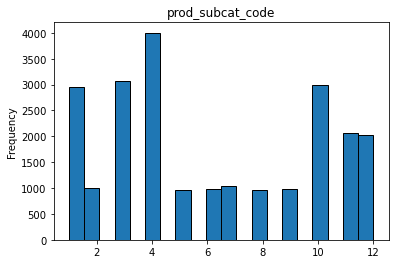

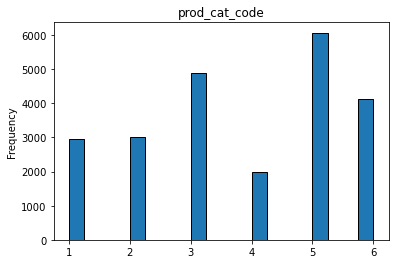

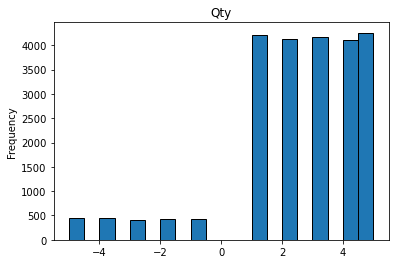

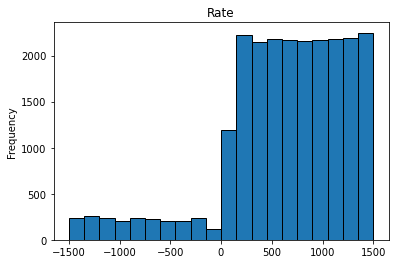

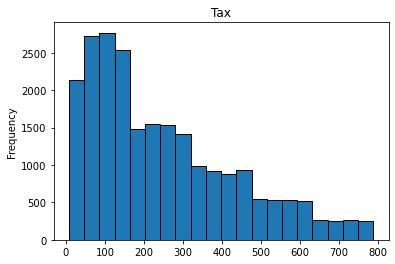

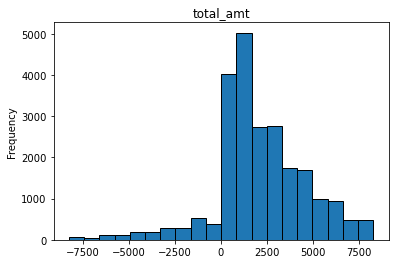

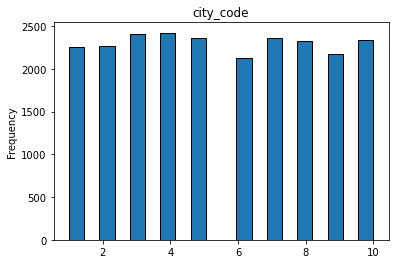

In [16]:
# Generate histograms for all continuous variables

cust_final_cont = customer_final.select_dtypes(exclude = "object").iloc[:, 2: ]

cust_final_cont 

for item in cust_final_cont:
    cust_final_cont[item].plot(kind = "hist", bins = 20, edgecolor = "black")
    plt.title(item)
    plt.show()

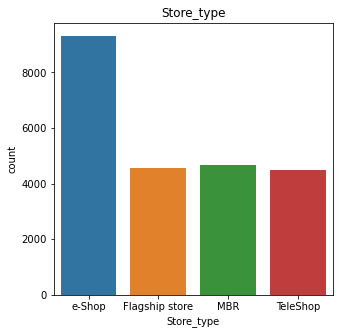

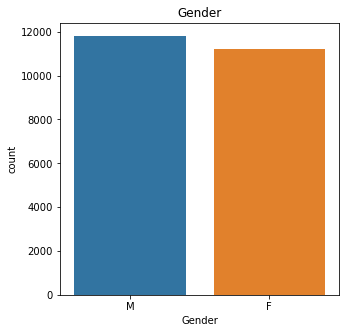

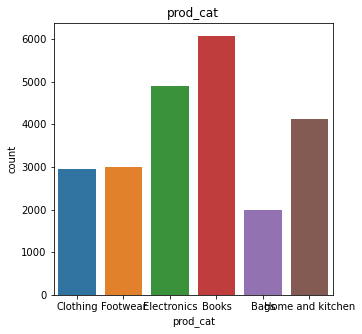

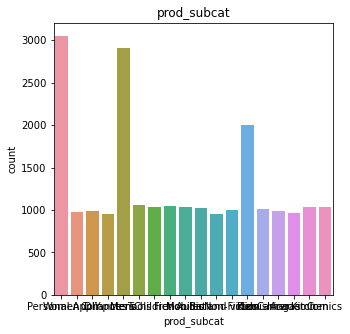

In [25]:
# Generate frequency bars for categorical variables

cust_final_cat = customer_final.select_dtypes(include = "object").iloc[:,1: ]

del cust_final_cat["DOB"]

for item in cust_final_cat:
    plt.figure(figsize = (5,5))
    sns.countplot(x = item, data = cust_final_cat)
    plt.title(item)
    plt.show()

5. Analyze which product categories are more popular among females vs male customers.

In [8]:
customer_gender = customer_final[["Gender", "prod_cat"]]

analyze_prod = customer_gender.groupby(by = ["Gender","prod_cat"], sort = False)["Gender"].count()

analyze_prod


Gender  prod_cat        
M       Clothing            1518
F       Clothing            1439
M       Footwear            1469
F       Footwear            1529
M       Electronics         2570
F       Electronics         2328
M       Books               3116
F       Books               2949
        Bags                 994
M       Bags                1004
F       Home and kitchen    1994
M       Home and kitchen    2134
Name: Gender, dtype: int64

6. Which City code has the maximum customers and what was the percentage of customers from
that city?

In [9]:
city = customer_final.groupby(by = ["city_code"])["cust_id"].count()

city = city.reset_index()


city["sum"] = city["cust_id"].sum()

city["per"] = ((city["cust_id"]/city["sum"])*100).round(2)

del city["sum"]

city[city["cust_id"] == city["cust_id"].max()]

,city_code,cust_id,per
3,4.0,2422,10.51


7. Which store type sells the maximum products by value and by quantity? 

In [10]:
store_type = customer_final[["Store_type", "prod_cat", "Qty", "total_amt"]]

store_type = store_type.groupby(by = ["Store_type", "prod_cat"])["Qty", "total_amt"].sum().reset_index()

store_type[(store_type["Qty"] == store_type["Qty"].max()) | (store_type["total_amt"] == store_type["total_amt"].max())]


<ipython-input-10-e4ffb097f81a>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  store_type = store_type.groupby(by = ["Store_type", "prod_cat"])["Qty", "total_amt"].sum().reset_index()


,Store_type,prod_cat,Qty,total_amt
19,e-Shop,Books,5974,5293443.935


8. What was the total amount earned from the "Electronics" and "Clothing" categories from
Flagship Stores?

In [11]:
store_type = customer_final[["Store_type", "prod_cat", "total_amt"]]

store_type = store_type.groupby(by = ["Store_type", "prod_cat"])["total_amt"].sum().reset_index()

store_type.iloc[2:4]

,Store_type,prod_cat,total_amt
2,Flagship store,Clothing,1194423.23
3,Flagship store,Electronics,2215136.04


9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [12]:
customer_final

total_amt = customer_final[["prod_cat","Gender","total_amt"]]

total_amt[(total_amt["prod_cat"] == "Electronics") & (total_amt["Gender"] == "M")]["total_amt"].sum().round(2)


5703109.43

10. How many customers have more than 10 unique transactions, after removing all transactions
which have any negative amounts?

In [13]:
customer = customer_final[["transaction_id","cust_id", "total_amt"]]

customer = customer[customer["total_amt"] > 0].groupby(by = ["cust_id", "transaction_id"]).count().reset_index()

customer = customer.groupby(by = "cust_id")["total_amt"].sum()

customer = customer.reset_index()

customer[customer["total_amt"] > 10].rename(columns = {"total_amt": "Unique Transactions"})

,cust_id,Unique Transactions
4,266794,11
2426,270535,11
2606,270803,11
3867,272741,11
4032,273014,11
4815,274227,11


11. For all customers aged between 25 - 35, find out:

a. What was the total amount spent for “Electronics” and “Books” product categories?
b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [50]:
date1 = dt.datetime.now().strftime("%Y-%m-%d")
today_date = pd.to_datetime(date1)
today_date

customer_final["Age"] = (today_date - pd.to_datetime(pd.DatetimeIndex(customer_final["DOB"]))).astype("<m8[Y]")

customer_final.head(3)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat,Age
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,26-09-1981,M,5.0,Clothing,Women,39
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,26-09-1981,M,5.0,Clothing,Women,39
2,18505840838,271509,16-12-2013,1,1,3,1229,387.135,4074.135,Flagship store,08-06-1981,M,3.0,Clothing,Women,39


In [54]:
customer_age = customer_final[(customer_final["Age"] >= 25) & (customer_final["Age"] <= 35)]

customer_age.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat,Age
3,92814475704,267750,16-08-2013,1,1,-4,-284,119.28,-1255.28,Flagship store,13-10-1986,M,1.0,Clothing,Women,34
4,92814475704,267750,7/8/2013,1,1,4,284,119.28,1255.28,Flagship store,13-10-1986,M,1.0,Clothing,Women,34
7,90501340928,271817,19-02-2012,1,1,1,1122,117.81,1239.81,TeleShop,24-12-1989,M,8.0,Clothing,Women,31
11,90954125896,269387,18-03-2013,1,1,4,839,352.38,3708.38,MBR,03-02-1990,F,10.0,Clothing,Women,31
17,11999444239,268052,18-06-2012,1,1,2,1324,278.04,2926.04,Flagship store,18-12-1988,M,7.0,Clothing,Women,32


In [55]:
# a. What was the total amount spent for “Electronics” and “Books” product categories?

total_amt = customer_age[["prod_cat","DOB" , "total_amt"]]

total_amt = total_amt[(total_amt["prod_cat"] == "Electronics") | (total_amt["prod_cat"] == "Books")].groupby(by = ["prod_cat"])["total_amt"].sum()

total_amt.reset_index()

,prod_cat,total_amt
0,Books,4043977.340
1,Electronics,3617731.325


In [64]:
# b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

customer_age.tran_date = pd.to_datetime(customer_age.tran_date)

customer_age.tran_date

cust_spent = customer_age[["tran_date","total_amt"]]
cust_spent

C:\Users\ronak\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,tran_date,total_amt
3,2013-08-16,-1255.28
4,2013-07-08,1255.28
7,2012-02-19,1239.81
11,2013-03-18,3708.38
17,2012-06-18,2926.04
...,...,...
23030,2011-09-20,824.33
23038,2011-03-20,1120.47
23043,2011-07-15,428.74
23046,2011-02-05,6104.02


In [71]:
total_amt = cust_spent[(cust_spent["tran_date"] >= pd.to_datetime("2014-01-01")) & (cust_spent["tran_date"] <= pd.to_datetime("2014-03-01"))]

amt = total_amt["total_amt"].sum()

print(f"total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014 = {amt}")

total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014 = 530412.155
